In [1]:
#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
xls = pd.ExcelFile('KPMG.xlsx')
txn = pd.read_excel(xls, 'Transactions')
txn.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
# describe default
txn.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object

txn.describe(include=[np.object]) 

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
# describe all
txn.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [7]:
# count số dòng bị null ở mỗi cột
txn.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all=txn.dropna()
df_dropna_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19445 non-null int64
product_id                 19445 non-null int64
customer_id                19445 non-null int64
transaction_date           19445 non-null datetime64[ns]
online_order               19445 non-null float64
order_status               19445 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19445 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info

df_dropna_online_order = txn.dropna(subset=['online_order'])
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             19640 non-null int64
product_id                 19640 non-null int64
customer_id                19640 non-null int64
transaction_date           19640 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               19640 non-null object
brand                      19445 non-null object
product_line               19445 non-null object
product_class              19445 non-null object
product_size               19445 non-null object
list_price                 19640 non-null float64
standard_cost              19445 non-null float64
product_first_sold_date    19445 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.1+ MB


## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0=txn.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = txn.fillna(method='ffill')
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = txn.fillna(method='bfill')
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


## 1.3. Assess Categorical Data

In [13]:
# load sheet Demographic và hiển thị top head
demo = pd.read_excel(xls, 'CustomerDemographic')
demo.head(5)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [14]:
# in ra info bảng
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            4000 non-null int64
first_name                             4000 non-null object
last_name                              3875 non-null object
gender                                 4000 non-null object
past_3_years_bike_related_purchases    4000 non-null int64
DOB                                    3913 non-null datetime64[ns]
job_title                              3494 non-null object
job_industry_category                  3344 non-null object
wealth_segment                         4000 non-null object
deceased_indicator                     4000 non-null object
default                                3698 non-null object
owns_car                               4000 non-null object
tenure                                 3913 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 406.3+ KB


In [15]:
# describe các giá trị object
demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [16]:
# Remove all NA rows, then use output for the following steps
demo_dna = demo.dropna()


In [17]:
# In ra các giá trị unique của cột gender

demo_dna.gender.unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [18]:
# Quy chuẩn cột gender về 2 nhóm Male và Female, Unisex và in ra giá trị unique mới
# demo.gender=demo.gender.replace(['M','U'],['Male','Unisex']) - bỏ vì k cònunisex
demo_dna.gender=demo.gender.replace(['F','Femal'],'Female')
demo_dna.gender.unique()

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array(['Female', 'Male'], dtype=object)

In [19]:
# Tính tuổi của mỗi khách hàng và lưu vào cột "age" và in ra min age, max age
cur_time=dt.datetime.now().year
demo_dna['age']= cur_time-pd.DatetimeIndex(demo_dna['DOB']).year
# demo_dna= demo_dna.query('age<100') -bỏ vì k còn lỗi age>=100

print(demo_dna.age.min())
print(demo_dna.age.max())


20
91


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"
# lưu vào cột "age_group" bằng cách sử dụng hàm cut

demo_dna['age_group']=  np.where(demo_dna.age<35,"Young",np.where(demo_dna.age>55,"Older","Middle"))
demo_dna.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,42,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68,Older
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0,49,Middle
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0,34,Young


# 2. Data Completeness

In [21]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)

# txn_dna = txn.dropna()
# demo_dna = demo.dropna()

mrg = pd.merge_ordered( df_dropna_all, demo_dna, on= 'customer_id', how='left' )
mrg.head()
# mrg.shape

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
1,3765,38,1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
2,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
3,9785,72,1,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
4,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,...,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older


In [22]:
#in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
mrg.query(" first_name !=first_name or  last_name !=last_name " )


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
21,12441,95,4,2017-04-03,0.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,14648,62,4,2017-06-18,1.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2250,34,5,2017-08-16,0.0,Approved,Norco Bicycles,Road,high,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2291,23,5,2017-03-03,1.0,Approved,Norco Bicycles,Mountain,low,small,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2534,84,5,2017-05-03,0.0,Approved,Trek Bicycles,Road,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,7692,39,5,2017-12-14,0.0,Approved,Giant Bicycles,Standard,medium,large,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,13058,96,5,2017-05-26,1.0,Approved,WeareA2B,Road,low,small,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,19993,13,5,2017-04-28,0.0,Approved,Solex,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,902,0,6,2017-05-21,0.0,Approved,Trek Bicycles,Standard,high,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4013,0,6,2017-09-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
mrg.customer_id.nunique()


3492

In [24]:
# Tính số khách hàng mỗi tháng
# hint 1: tạo column year_month bằng hàm dt.strftime
# hint 2: group by year_month và nunique
mrg['year_month']= mrg.transaction_date.dt.strftime('%m-%Y') 
mrg.groupby('year_month')['customer_id'].nunique()


year_month
01-2017    1321
02-2017    1258
03-2017    1277
04-2017    1284
05-2017    1281
06-2017    1238
07-2017    1327
08-2017    1346
09-2017    1240
10-2017    1378
11-2017    1281
12-2017    1294
Name: customer_id, dtype: int64

In [25]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost
# hint 1: tạo column gross_margin
# hint 2: group by year_month và sử dụng hàm agg
mrg['gross_margin']= mrg.list_price - mrg.standard_cost
# gross_margin_month = mrg.groupby('year_month').agg({'gross_margin':'sum'})
gross_margin_month = mrg.pivot_table(index='year_month',values='gross_margin', aggfunc=np.sum)
gross_margin_month


,gross_margin
year_month,
01-2017,915151.359988
02-2017,852514.230000
03-2017,865312.550000
04-2017,888856.890000
05-2017,904003.210000
06-2017,841815.260000
07-2017,919677.790000
08-2017,951376.270000
09-2017,843736.130000


In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 
# hint 1: group by online_order, order_status và sử dụng hàm agg
mrg.groupby(['online_order','order_status'])['list_price'].agg(['sum','count']).round(1)


sum  count
online_order order_status                   
0.0          Approved      10666230.0   9631
             Cancelled        86837.9     75
1.0          Approved      10670179.6   9642
             Cancelled       108924.2     97

# 4. Data Visualization

In [27]:
# Sử dụng seaborn và vẽ ra 5 chart khác nhau (column, line, box,...) với đầy đủ tên chart, tên các trục và chú thích.

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('RdBu')

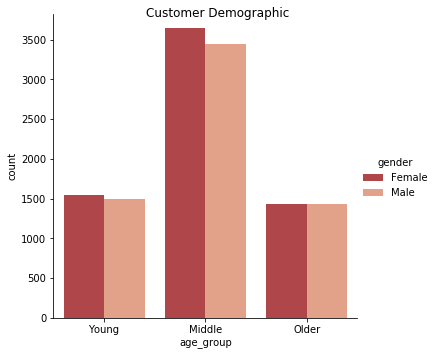

In [28]:
v1 = sns.catplot(x='age_group',data=mrg, kind='count', hue='gender',order=['Young','Middle','Older'] )
v1.fig.suptitle('Customer Demographic')
plt.show()

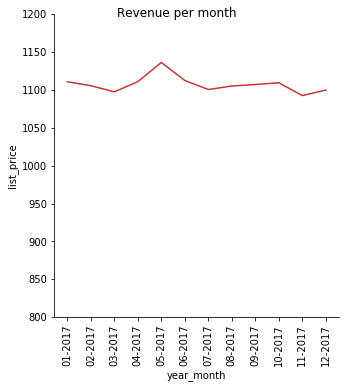

In [33]:
v2 = sns.relplot(x='year_month',y='list_price',data=mrg, kind='line',ci=None )
v2.fig.suptitle('Revenue per month')
v2.set(ylim=(800,1200))
plt.xticks(rotation=90)
plt.show()


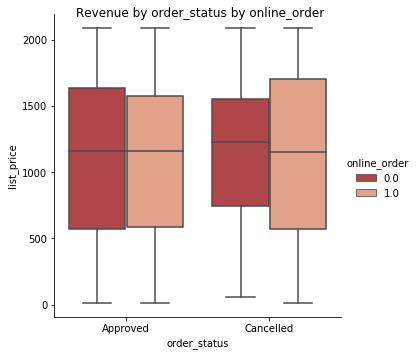

In [30]:
v3 = sns.catplot(x='order_status',y='list_price',data=mrg, kind='box',ci=None,hue='online_order' )
v3.fig.suptitle('Revenue by order_status by online_order', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Administrator\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


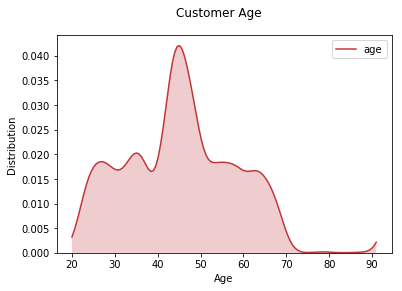

In [31]:
v4 = sns.kdeplot(mrg.age, shade=True, cut =0, clip=(0,2000))
v4.figure.suptitle("Customer Age", fontsize = 12)

plt.xlabel('Age', fontsize=10)
plt.ylabel('Distribution', fontsize=10)
plt.show()

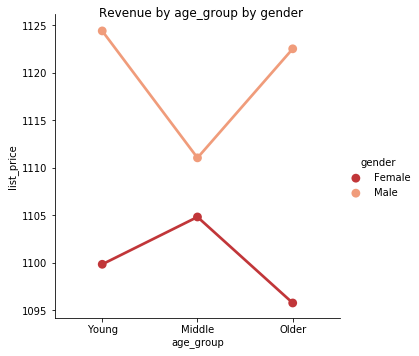

In [32]:
v5 = sns.catplot(x='age_group',y='list_price',data=mrg, kind='point',ci=None,hue='gender', order=['Young','Middle','Older'] )
v5.fig.suptitle('Revenue by age_group by gender')
# v5.set(ylim=(0,1200))
plt.show()